# PIMA DIABITIES

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
import pandas as pd

Using TensorFlow backend.


In [179]:
d=pd.read_csv(r"C:\\Users\\hamza jamil\\Downloads\Video\\pima-indians-diabetes.csv")
d.head()

,num_preg,glucose_con,Diastolic_bp,Thckness,Insulin,BMI,Diab_pred,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
num_preg        768 non-null int64
glucose_con     768 non-null int64
Diastolic_bp    768 non-null int64
Thckness        768 non-null int64
Insulin         768 non-null int64
BMI             768 non-null float64
Diab_pred       768 non-null float64
Age             768 non-null int64
Target          768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# correlation matrix

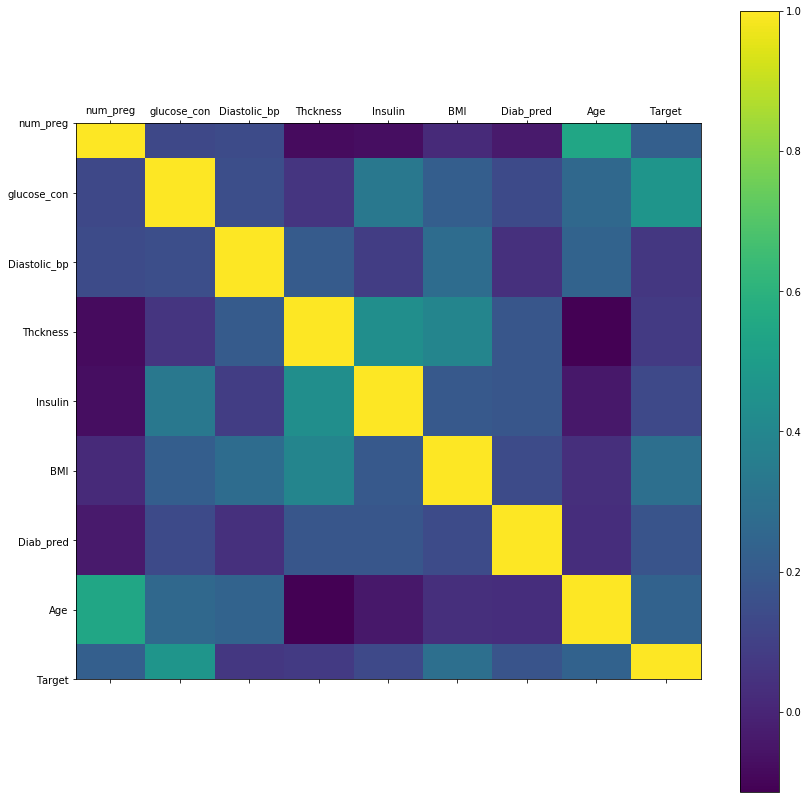

In [18]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as Featuree
from matplotlib.cm import rainbow
%matplotlib inline
rcParams['figure.figsize'] = 20, 14
plt.matshow(d.corr())
plt.yticks(np.arange(d.shape[1]), d.columns)
plt.xticks(np.arange(d.shape[1]), d.columns)
plt.colorbar()

# First we sort instance by age

In [7]:
data=d.sort_values(by=['Age'])
data.head()               #here we sort data by Age

,num_preg,glucose_con,Diastolic_bp,Thckness,Insulin,BMI,Diab_pred,Age,Target
255,1,113,64,35,0,33.6,0.543,21,1
60,2,84,0,0,0,0.0,0.304,21,0
102,0,125,96,0,0,22.5,0.262,21,0
182,1,0,74,20,23,27.7,0.299,21,0
623,0,94,70,27,115,43.5,0.347,21,0


# Now here we drop duplicate value in our data

In [8]:
dup=data.drop_duplicates(keep=False,inplace=True)
dup                   #here we use drop_duplicate method to drop duplcate value but here we have not duplicate value

In [9]:
len(data)

768

# here we check missing value in our data

In [10]:
data.isnull().values.any() #here we see we have no any null value

False

# here we checking NAN N/A value in our data

In [11]:
dro=data.dropna()
dro.head()             

,num_preg,glucose_con,Diastolic_bp,Thckness,Insulin,BMI,Diab_pred,Age,Target
255,1,113,64,35,0,33.6,0.543,21,1
60,2,84,0,0,0,0.0,0.304,21,0
102,0,125,96,0,0,22.5,0.262,21,0
182,1,0,74,20,23,27.7,0.299,21,0
623,0,94,70,27,115,43.5,0.347,21,0


In [12]:
len(dro)       #here we have no any NAN values in our dataset      

768

# Here we Distribute our dataset in  two group

In [126]:
#first we distribute our dataset into two variable 
x=dro.drop(['Target','Age'],axis='columns').values 
                                 
y=dro.Target.values


# Here we Normalized our Datasets

In [15]:
# Now we Normalze our dataset
from sklearn import preprocessing
 #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Norm=pd.DataFrame(x_scaled,index=dro.index,columns=dro.columns[0:7])
Norm['Age']=dro["Age"]
Norm['Target']=dro['Target']
Norm.head()

#after the normalization we apply squirel algorithm to find the feature

,num_preg,glucose_con,Diastolic_bp,Thckness,Insulin,BMI,Diab_pred,Age,Target
255,0.058824,0.567839,0.524590,0.353535,0.000000,0.500745,0.198548,21,1
60,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,21,0
102,0.000000,0.628141,0.786885,0.000000,0.000000,0.335320,0.078565,21,0
182,0.058824,0.000000,0.606557,0.202020,0.027187,0.412817,0.094364,21,0
623,0.000000,0.472362,0.573770,0.272727,0.135934,0.648286,0.114859,21,0


# Here we identify our important features to the help of Algorithm

C:\Users\hamza jamil\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


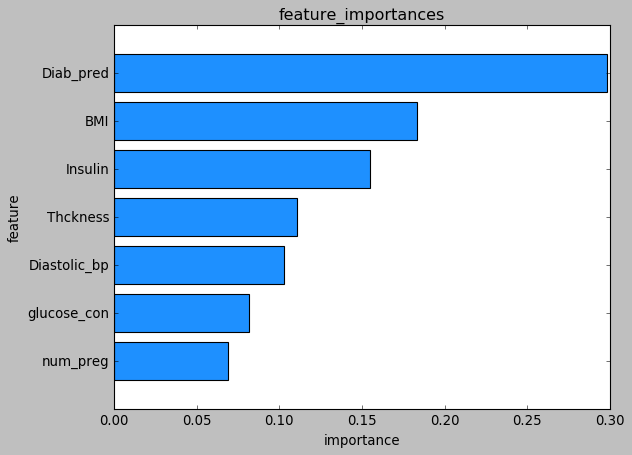

In [130]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
def Squirrel(algo_namem,features_nums):
    sfs_name=SFS(algo_namem, 
                k_features=features_nums, 
                forward=True, 
                floating=False,)
    return sfs_name
Squirrel=Featuree()
Squirrel.fit(x,y)
feature_importance = Squirrel.feature_importances_
feat_importances = pd.Series(Squirrel.feature_importances_, d.columns[0:7])
feat_importances = feat_importances.nlargest(13)

feature = d.columns.values.tolist()[0:7]
importance = sorted(Squirrel.feature_importances_.tolist())


x_pos = [i for i, _ in enumerate(feature)]

plt.barh(x_pos, importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")

plt.yticks(x_pos, feature)

plt.show()

In [131]:
# now here we pick up the feature with given visualization grap
x=Norm.drop(["Target"],axis='columns')
y=Norm.Target

In [132]:
x.head()

,num_preg,glucose_con,Diastolic_bp,Thckness,Insulin,BMI,Diab_pred,Age
255,0.058824,0.567839,0.524590,0.353535,0.000000,0.500745,0.198548,21
60,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,21
102,0.000000,0.628141,0.786885,0.000000,0.000000,0.335320,0.078565,21
182,0.058824,0.000000,0.606557,0.202020,0.027187,0.412817,0.094364,21
623,0.000000,0.472362,0.573770,0.272727,0.135934,0.648286,0.114859,21


# here we Split Our dataset into training & testing

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)


#  here we Apply Artifical Neural Network

In [89]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils

# Here we create Neuron for our ANN

In [137]:
#here we create Neural Network Layer
model = Sequential()
model.add(Dense(8, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(30,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

C:\Users\hamza jamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=8, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [138]:
model.summary()  #this is our summary of neuron in ANN

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_8 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


# Here we compile our model with Binary Cross Entropy

In [139]:
#here we compile our ANN
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


#  Training Phase

In [142]:
de=model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=4)
de

Train on 537 samples, validate on 231 samples
Epoch 1/30
160/537 [=======>......................] - ETA: 0s - loss: 0.5386 - acc: 0.7188

C:\Users\hamza jamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


537/537 [==============================] - 0s 669us/step - loss: 0.5730 - acc: 0.6797 - val_loss: 0.5792 - val_acc: 0.6364
Epoch 2/30
537/537 [==============================] - 0s 437us/step - loss: 0.5668 - acc: 0.6927 - val_loss: 0.5977 - val_acc: 0.6450
Epoch 3/30
537/537 [==============================] - 0s 479us/step - loss: 0.5660 - acc: 0.6946 - val_loss: 0.5612 - val_acc: 0.7100
Epoch 4/30
537/537 [==============================] - 0s 415us/step - loss: 0.5706 - acc: 0.6890 - val_loss: 0.5608 - val_acc: 0.7100
Epoch 5/30
537/537 [==============================] - 0s 451us/step - loss: 0.5602 - acc: 0.7058 - val_loss: 0.5560 - val_acc: 0.7056
Epoch 6/30
537/537 [==============================] - 0s 504us/step - loss: 0.5582 - acc: 0.7095 - val_loss: 0.5561 - val_acc: 0.7056
Epoch 7/30
537/537 [==============================] - 0s 444us/step - loss: 0.5588 - acc: 0.7114 - val_loss: 0.5521 - val_acc: 0.7100
Epoch 8/30
537/537 [==============================] - 0s 502us/step - los

# Model Accuracy

In [143]:
scores = model.evaluate(X_test, y_test)

print("accuracy: %.2f%%" %(scores[1]*100))


231/231 [==============================] - 0s 80us/step
accuracy: 75.32%


# Testing Phase or prediction Phase

In [144]:
Y_pred=model.predict(X_test)
Y_pred# ths is our testing Phase

array([[0.10121083],
       [0.5730343 ],
       [0.08701357],
       [0.78603697],
       [0.22969136],
       [0.22770295],
       [0.3040149 ],
       [0.68404293],
       [0.4047493 ],
       [0.07561126],
       [0.10667419],
       [0.61954266],
       [0.15516639],
       [0.15240276],
       [0.40555954],
       [0.25751847],
       [0.38736722],
       [0.22272989],
       [0.75928396],
       [0.47450608],
       [0.32363796],
       [0.12367311],
       [0.26883993],
       [0.41810486],
       [0.2787934 ],
       [0.3654092 ],
       [0.6703037 ],
       [0.4115484 ],
       [0.10188153],
       [0.35896674],
       [0.524399  ],
       [0.97541213],
       [0.2466965 ],
       [0.7759744 ],
       [0.4018069 ],
       [0.4531701 ],
       [0.5760771 ],
       [0.08550206],
       [0.39406744],
       [0.23898482],
       [0.07966131],
       [0.20555443],
       [0.71393645],
       [0.5844488 ],
       [0.18468723],
       [0.07905647],
       [0.6065322 ],
       [0.394

In [146]:
pred_cl=model.predict_classes(X_test) # ths is our testing Phase
pred_cl

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

# Classfication report of our Model with  precision, recall, accuracy

In [147]:
from sklearn.metrics import classification_report,confusion_matrix
targe = ['Patient 1', 'Not Patient 0']
print(classification_report(y_test,pred_cl,target_names=targe))

               precision    recall  f1-score   support

    Patient 1       0.74      0.92      0.82       144
Not Patient 0       0.79      0.47      0.59        87

     accuracy                           0.75       231
    macro avg       0.77      0.70      0.71       231
 weighted avg       0.76      0.75      0.74       231



# Instance Evaluation to the help of Confusion Metrix 

confusion metrix without normalize
[[133  11]
 [ 46  41]]


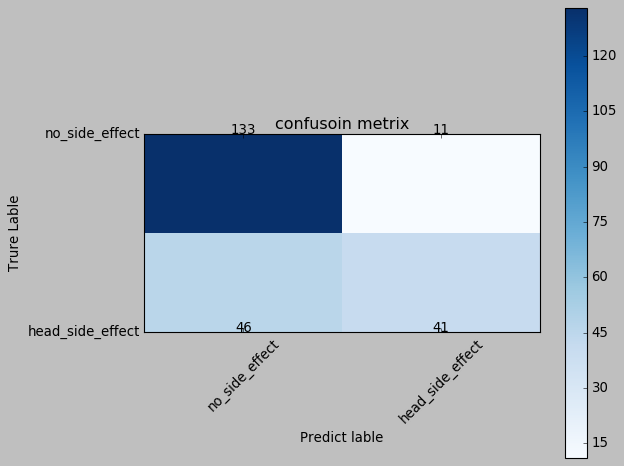

In [148]:
from sklearn.metrics import confusion_matrix
import itertools
cm=confusion_matrix(y_test,pred_cl)

def go(cm,classes,title='CONFUSOIN METRIX',normalize=False,cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_mark=np.arange(len(classes))
    plt.xticks(tick_mark,classes,rotation=45)
    plt.yticks(tick_mark,classes)
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalize cnfusion metrix")
    else:
        
        print("confusion metrix without normalize")
    print(cm)    
    thresh=cm.max() / 1
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('Trure Lable')
    plt.xlabel('Predict lable')
        
    
cm_lable=['no_side_effect','head_side_effect']    
go(cm,cm_lable,title='confusoin metrix')
    
   
    


# ANN Model Loss visualization

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


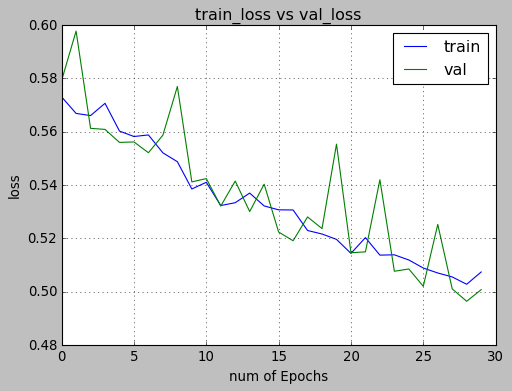

In [150]:
nb_epoch=30
train_loss=de.history['loss']
val_loss=de.history['val_loss']
train_acc=de.history['acc']
val_acc=de.history['val_acc']
xc=range(nb_epoch)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print(plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


# ANN Model Accuracy visualization

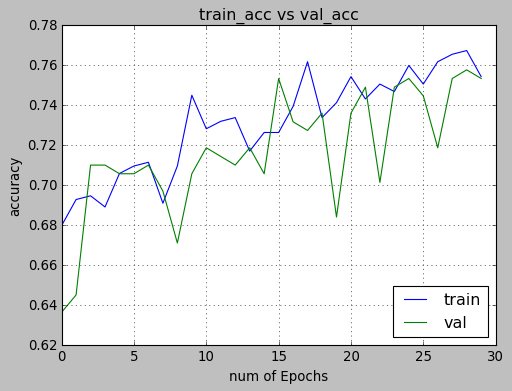

In [151]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

# Now we apply DLMNN [Deep learning Modifed Neural Network]

In [153]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,BatchNormalization,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils


# Here we create  Deep Neuron for DLMNN

In [160]:
mode = Sequential()
mode.add(Dense(8, input_dim=8, init='uniform', activation='relu'))
mode.add(Dense(30,  activation='relu'))
mode.add(Dense(40,  activation='relu'))
mode.add(Dense(50,  activation='relu'))
mode.add(Dense(60,  activation='relu'))
mode.add(Dense(70,  activation='relu'))
mode.add(Dense(80,  activation='relu'))
mode.add(Dense(1,  activation='sigmoid'))

C:\Users\hamza jamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, input_dim=8, activation="relu", kernel_initializer="uniform")`
  


In [161]:
mode.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_29 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_30 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_31 (Dense)             (None, 50)                2050      
_________________________________________________________________
dense_32 (Dense)             (None, 60)                3060      
_________________________________________________________________
dense_33 (Dense)             (None, 70)                4270      
_________________________________________________________________
dense_34 (Dense)             (None, 80)                5680      
__________

# DLMNN Complile with binary  Entropy

In [162]:
mode.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Training Phase

In [163]:
g=mode.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=50, batch_size=5)
g

C:\Users\hamza jamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 537 samples, validate on 231 samples
Epoch 1/50
537/537 [==============================] - 2s 3ms/step - loss: 0.6636 - acc: 0.6629 - val_loss: 0.6716 - val_acc: 0.6234
Epoch 2/50
537/537 [==============================] - 0s 531us/step - loss: 0.6475 - acc: 0.6629 - val_loss: 0.6639 - val_acc: 0.6234
Epoch 3/50
537/537 [==============================] - 0s 481us/step - loss: 0.6433 - acc: 0.6629 - val_loss: 0.6714 - val_acc: 0.6234
Epoch 4/50
537/537 [==============================] - 0s 507us/step - loss: 0.6383 - acc: 0.6629 - val_loss: 0.6433 - val_acc: 0.6234
Epoch 5/50
537/537 [==============================] - 0s 477us/step - loss: 0.6259 - acc: 0.6629 - val_loss: 0.6300 - val_acc: 0.6234
Epoch 6/50
537/537 [==============================] - 0s 507us/step - loss: 0.6081 - acc: 0.6629 - val_loss: 0.5960 - val_acc: 0.6234
Epoch 7/50
537/537 [==============================] - 0s 509us/step - loss: 0.6114 - acc: 0.6592 - val_loss: 0.6002 - val_acc: 0.6234
Epoch 8/50
537/537

# Model Accuracy

In [164]:
scor = mode.evaluate(X_test, y_test)

print("accuracy: %.2f%%" %(scor[1]*100))


231/231 [==============================] - 0s 91us/step
accuracy: 77.49%


# Model Testing Phase or Predictoin Phase

In [165]:
p_pred=mode.predict(X_test)
p_pred

array([[0.04611978],
       [0.523155  ],
       [0.01716837],
       [0.6332464 ],
       [0.13319632],
       [0.17375234],
       [0.18793249],
       [0.6882944 ],
       [0.5212972 ],
       [0.0162974 ],
       [0.02737933],
       [0.6184912 ],
       [0.06794104],
       [0.05681315],
       [0.44926178],
       [0.1919674 ],
       [0.24958405],
       [0.07785881],
       [0.5409494 ],
       [0.33408716],
       [0.22534472],
       [0.02758241],
       [0.11617896],
       [0.35675985],
       [0.11171836],
       [0.3267979 ],
       [0.457409  ],
       [0.5550985 ],
       [0.02025819],
       [0.26201147],
       [0.55062824],
       [0.8136778 ],
       [0.1897806 ],
       [0.66724837],
       [0.2115415 ],
       [0.2722906 ],
       [0.5157187 ],
       [0.0174641 ],
       [0.23363453],
       [0.10249126],
       [0.01685071],
       [0.13730046],
       [0.64962155],
       [0.53196216],
       [0.12139335],
       [0.01597244],
       [0.6456351 ],
       [0.227

In [166]:
pre_cl=mode.predict_classes(X_test) # ths is our testing Phase
pre_cl

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

# Classfication report of our Model with precision, recall, accuracy

In [174]:
from sklearn.metrics import classification_report,confusion_matrix
targe = ['Patient 1', 'Not Patient 0']
print(classification_report(y_test,pre_cl,target_names=targe))

               precision    recall  f1-score   support

    Patient 1       0.76      0.94      0.84       144
Not Patient 0       0.83      0.51      0.63        87

     accuracy                           0.77       231
    macro avg       0.79      0.72      0.73       231
 weighted avg       0.79      0.77      0.76       231



# Instance Evaluation to the help of Confusion Metrix

confusion metrix without normalize
[[135   9]
 [ 43  44]]


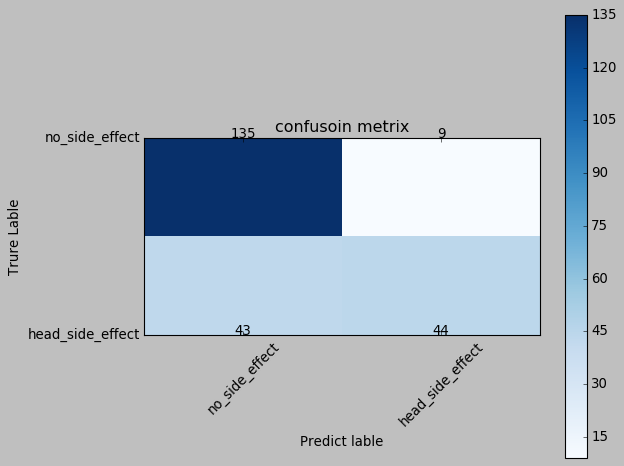

In [180]:
from sklearn.metrics import confusion_matrix
import itertools
cm=confusion_matrix(y_test,pre_cl)

def go(cm,classes,title='CONFUSOIN METRIX',normalize=False,cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_mark=np.arange(len(classes))
    plt.xticks(tick_mark,classes,rotation=45)
    plt.yticks(tick_mark,classes)
    if normalize:
        cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalize cnfusion metrix")
    else:
        
        print("confusion metrix without normalize")
    print(cm)    
    thresh=cm.max() / 1
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('Trure Lable')
    plt.xlabel('Predict lable')
        
    
cm_lable=['no_side_effect','head_side_effect']    
go(cm,cm_lable,title='confusoin metrix')
    

# DLMNN Model Loss visualization

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


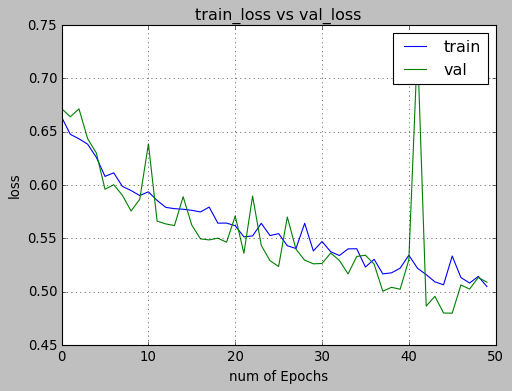

In [176]:
nb_epoch=50
train_los=g.history['loss']
val_los=g.history['val_loss']
train_ac=g.history['acc']
val_ac=g.history['val_acc']
xd=range(nb_epoch)
plt.figure(1,figsize=(7,5))
plt.plot(xd,train_los)
plt.plot(xd,val_los)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print(plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


# DLMNN Model Accuracy visualization

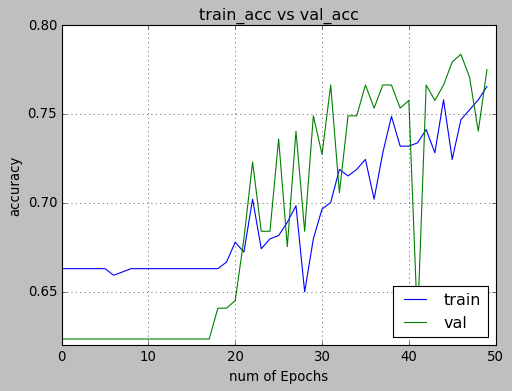

In [173]:
plt.figure(2,figsize=(7,5))
plt.plot(xd,train_ac)
plt.plot(xd,val_ac)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])